In [ ]:
### importar librerias 

import pandas as pd
import numpy as np


# Ajuste de los datos

In [10]:
## lectura de la base de datos 

datos_juridi = pd.read_excel("datos_juridicos.xlsx")

In [ ]:
datos_juridi.head()

,Numero Creditos Vigentes,Zona Geografica,Monto Desembolsado,Ciudad de Residencia,Numero Creditos Cerrados,Ventas Negocio,Producto Financiero,Maximo Dias Mora,Zona Comercial,Calificacion Crediticia,Asesor Comercial,Experiencia Bancaria,Ingresos Operativos Negocio,Antiguedad Negocio,Ingresos Mensuales,Gastos Negocio
0,3,Urbano,61295443,Ciudad 515,21,727628,Producto 2,28,Zona Comercial 2,Alto,Asesor 182,10,4271799,13,1725803,7712270
1,5,Urbano,40119342,Ciudad 834,65,3374750,Producto 8,0,Zona Comercial 2,Bajo,Asesor 196,17,3262552,13,5756382,1844003
2,3,Rural,35452244,Ciudad 856,33,1025512,Producto 26,57,Zona Comercial 1,Bajo,Asesor 39,30,2142591,27,1685907,8741262
3,2,Urbano,40372604,Ciudad 912,8,12222938,Producto 11,12,Zona Comercial 1,Bajo,Asesor 93,4,1223992,14,6850017,6496586
4,6,Urbano,26885164,Ciudad 567,42,1088216,Producto 37,60,Zona Comercial 2,Medio,Asesor 164,20,4783604,12,5824373,3891036


In [11]:
columnas_a_eliminar = ['Asesor Comercial', 'Ciudad de Residencia', 'Producto Financiero']
datos_juridi = datos_juridi.drop(columns=columnas_a_eliminar)


In [14]:
datos_juridi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111161 entries, 0 to 111160
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Numero Creditos Vigentes     111161 non-null  int64 
 1   Zona Geografica              111161 non-null  object
 2   Monto Desembolsado           111161 non-null  int64 
 3   Numero Creditos Cerrados     111161 non-null  int64 
 4   Ventas Negocio               111161 non-null  int64 
 5   Maximo Dias Mora             111161 non-null  int64 
 6   Zona Comercial               111161 non-null  object
 7   Calificacion Crediticia      111161 non-null  object
 8   Experiencia Bancaria         111161 non-null  int64 
 9   Ingresos Operativos Negocio  111161 non-null  int64 
 10  Antiguedad Negocio           111161 non-null  int64 
 11  Ingresos Mensuales           111161 non-null  int64 
 12  Gastos Negocio               111161 non-null  int64 
dtypes: int64(10), 

In [15]:
# Codificar variables categóricas (one-hot encoding)
datos_juridi = pd.get_dummies(datos_juridi, drop_first=True)


In [16]:
datos_juridi

,Numero Creditos Vigentes,Monto Desembolsado,Numero Creditos Cerrados,Ventas Negocio,Maximo Dias Mora,Experiencia Bancaria,Ingresos Operativos Negocio,Antiguedad Negocio,Ingresos Mensuales,Gastos Negocio,Zona Geografica_Urbano,Zona Comercial_Zona Comercial 2,Zona Comercial_Zona Rural,Calificacion Crediticia_Bajo,Calificacion Crediticia_Medio
0,3,61295443,21,727628,28,10,4271799,13,1725803,7712270,True,True,False,False,False
1,5,40119342,65,3374750,0,17,3262552,13,5756382,1844003,True,True,False,True,False
2,3,35452244,33,1025512,57,30,2142591,27,1685907,8741262,False,False,False,True,False
3,2,40372604,8,12222938,12,4,1223992,14,6850017,6496586,True,False,False,True,False
4,6,26885164,42,1088216,60,20,4783604,12,5824373,3891036,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111156,6,26908200,30,11324457,0,20,1837942,28,2410577,9111634,False,True,False,True,False
111157,3,65615640,21,6055216,47,8,6206958,5,832323,5796560,True,True,False,True,False
111158,2,33813105,8,1959107,39,7,4884410,13,3284600,3706816,False,True,False,False,False
111159,2,142531742,8,9695436,10,4,2671127,8,6013594,2231671,False,False,False,False,True


In [17]:
from sklearn.model_selection import train_test_split

# Supongamos que 'Y' es la variable objetivo y el resto son predictores
X = datos_juridi.drop(columns='Monto Desembolsado')  # Reemplaza 'Y' con el nombre real de tu variable objetivo
y = datos_juridi['Monto Desembolsado']

# Partición: 70% entrenamiento, 30% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Verificación de tamaños
print(f'Tamaño del conjunto de entrenamiento: {X_train.shape[0]}')
print(f'Tamaño del conjunto de prueba: {X_test.shape[0]}')


Tamaño del conjunto de entrenamiento: 77812
Tamaño del conjunto de prueba: 33349


# Modelos para la parte comercial 

## Modelo de regresión lineal multiple

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [29]:
# Convertir booleanos a enteros
X_train_numerico = X_train.astype(int)


## OLS para mirar significancia de los coeficientes

In [30]:
import statsmodels.api as sm

# Agregar constante (intercepto)
X_train_sm = sm.add_constant(X_train_numerico)

# Ajustar modelo OLS
modelo_ols = sm.OLS(y_train, X_train_sm).fit()

# Mostrar resumen con significancia estadística
print(modelo_ols.summary())

                            OLS Regression Results                            
Dep. Variable:     Monto Desembolsado   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9205
Date:                Sat, 22 Mar 2025   Prob (F-statistic):              0.535
Time:                        09:46:19   Log-Likelihood:            -1.4882e+06
No. Observations:               77812   AIC:                         2.976e+06
Df Residuals:                   77797   BIC:                         2.977e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [31]:
# Modelo de regresión lineal
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

# Predicciones
y_pred_lr = modelo_lr.predict(X_test)

# Métricas
print("🔹 Regresión Lineal:")
print("R²:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))


🔹 Regresión Lineal:
R²: -1.456461839389322e+18
MSE: 3.490353601342458e+33


## Modelo regresión lasso 

In [35]:
# Modelo LASSO con penalización lambda (alpha)
modelo_lasso = Lasso(alpha=1.0)  # Puedes ajustar alpha
modelo_lasso.fit(X_train, y_train)

# Predicciones
y_pred_lasso = modelo_lasso.predict(X_test)

# Métricas
print("\n🔹 LASSO:")
print("R²:", r2_score(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))



🔹 LASSO:
R²: -1.456451907026507e+18
MSE: 3.4903297988250266e+33


In [38]:
import pandas as pd

# Crear un DataFrame con los nombres de las variables
coeficientes_lr = pd.DataFrame({
    'Variable': X.columns,
    'Coef_LASSO': modelo_lasso.coef_
})

# Mostrar los coeficientes ordenados por magnitud en la regresión lineal
print(coeficientes_lr)


                           Variable    Coef_LASSO
0          Numero Creditos Vigentes -7.250917e+04
1          Numero Creditos Cerrados  3.116477e+03
2                    Ventas Negocio  6.964788e-02
3                  Maximo Dias Mora  9.629980e+03
4              Experiencia Bancaria -1.938031e+04
5       Ingresos Operativos Negocio -4.302327e-02
6                Antiguedad Negocio  1.272519e+04
7                Ingresos Mensuales  2.928159e-02
8                    Gastos Negocio  6.346635e-02
9            Zona Geografica_Urbano  5.616616e+05
10  Zona Comercial_Zona Comercial 2  2.074560e+05
11        Zona Comercial_Zona Rural  4.139712e+07
12     Calificacion Crediticia_Bajo -4.128135e+05
13    Calificacion Crediticia_Medio -7.337360e+05


## Validación cruzada en regresión lasso

In [39]:
from sklearn.linear_model import LassoCV

# Convertir booleanos a enteros si no lo habías hecho
X_train_cv = X_train.astype(int)
X_test_cv = X_test.astype(int)

# Ajustar modelo LASSO con validación cruzada
lasso_cv = LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10], random_state=0, cv=5)
lasso_cv.fit(X_train_cv, y_train)

# Mejor alpha encontrado
print("🔍 Mejor valor de alpha:", lasso_cv.alpha_)

# Puntajes R²
print("R² en train:", lasso_cv.score(X_train_cv, y_train))
print("R² en test :", lasso_cv.score(X_test_cv, y_test))


c:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.593305595007795e+16, tolerance: 1.4948282051580222e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.6789329885953065e+18, tolerance: 1.4948282051580222e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.570388764978381e+16, tolerance: 1.4904083450238102e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_c

🔍 Mejor valor de alpha: 10.0
R² en train: 0.00016562479231152505
R² en test : -190689.11976372192


c:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.132788729049583e+19, tolerance: 7.476813179950606e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.303560490475133e+19, tolerance: 7.476813179950606e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.230094703613231e+19, tolerance: 7.476813179950606e+16
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_coord

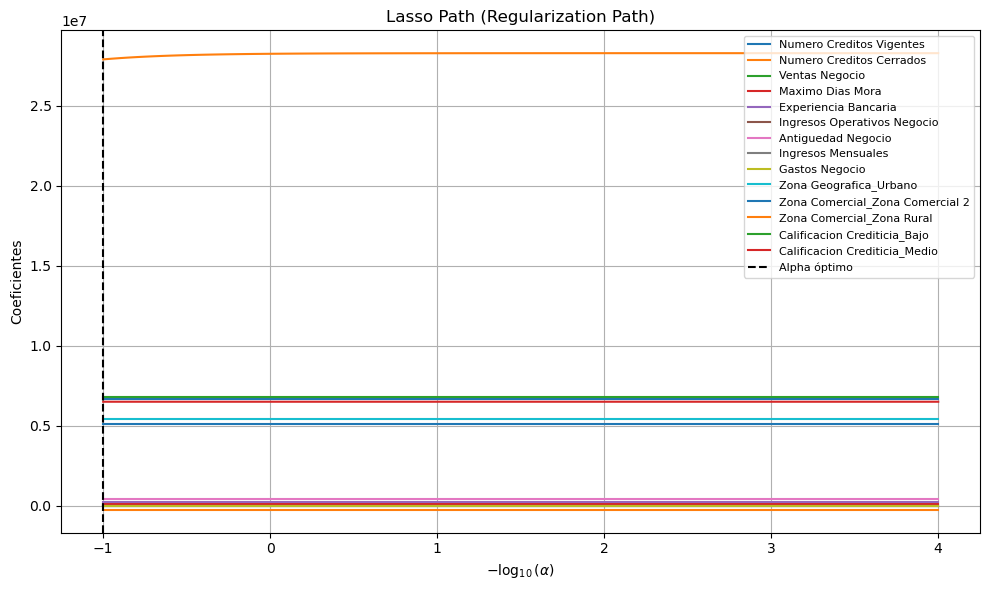

In [40]:
from sklearn.linear_model import lasso_path
import matplotlib.pyplot as plt
import numpy as np

# Asegúrate de tener todos los predictores en formato numérico
X_cv = X_train.astype(float)
y_cv = y_train

# Calcular el Lasso path
alphas_lasso, coefs_lasso, _ = lasso_path(X_cv, y_cv, alphas=np.logspace(-4, 1, 100))

# Graficar
plt.figure(figsize=(10, 6))
for i in range(coefs_lasso.shape[0]):
    plt.plot(-np.log10(alphas_lasso), coefs_lasso[i, :], label=X_cv.columns[i])

plt.xlabel(r'$-\log_{10}(\alpha)$')
plt.ylabel('Coeficientes')
plt.title('Lasso Path (Regularization Path)')
plt.axvline(-np.log10(lasso_cv.alpha_), color='black', linestyle='--', label='Alpha óptimo')
plt.legend(loc='best', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()


# Modelos para la parte finaciera 

In [42]:

datos_juridi = pd.read_excel("datos_juridicos.xlsx")

In [48]:
datos_juridi

,Numero Creditos Vigentes,Zona Geografica,Monto Desembolsado,Ciudad de Residencia,Numero Creditos Cerrados,Ventas Negocio,Producto Financiero,Maximo Dias Mora,Zona Comercial,Calificacion Crediticia,Asesor Comercial,Experiencia Bancaria,Ingresos Operativos Negocio,Antiguedad Negocio,Ingresos Mensuales,Gastos Negocio
0,3,Urbano,61295443,Ciudad 515,21,727628,Producto 2,28,Zona Comercial 2,Alto,Asesor 182,10,4271799,13,1725803,7712270
1,5,Urbano,40119342,Ciudad 834,65,3374750,Producto 8,0,Zona Comercial 2,Bajo,Asesor 196,17,3262552,13,5756382,1844003
2,3,Rural,35452244,Ciudad 856,33,1025512,Producto 26,57,Zona Comercial 1,Bajo,Asesor 39,30,2142591,27,1685907,8741262
3,2,Urbano,40372604,Ciudad 912,8,12222938,Producto 11,12,Zona Comercial 1,Bajo,Asesor 93,4,1223992,14,6850017,6496586
4,6,Urbano,26885164,Ciudad 567,42,1088216,Producto 37,60,Zona Comercial 2,Medio,Asesor 164,20,4783604,12,5824373,3891036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111156,6,Rural,26908200,Ciudad 764,30,11324457,Producto 42,0,Zona Comercial 2,Bajo,Asesor 123,20,1837942,28,2410577,9111634
111157,3,Urbano,65615640,Ciudad 898,21,6055216,Producto 26,47,Zona Comercial 2,Bajo,Asesor 48,8,6206958,5,832323,5796560
111158,2,Rural,33813105,Ciudad 698,8,1959107,Producto 12,39,Zona Comercial 2,Alto,Asesor 132,7,4884410,13,3284600,3706816
111159,2,Rural,142531742,Ciudad 661,8,9695436,Producto 49,10,Zona Comercial 1,Medio,Asesor 74,4,2671127,8,6013594,2231671


## Modelo de regresión logistica

In [51]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111161 entries, 0 to 111160
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Numero Creditos Vigentes     111161 non-null  int64 
 1   Zona Geografica              111161 non-null  object
 2   Monto Desembolsado           111161 non-null  int64 
 3   Ciudad de Residencia         111161 non-null  object
 4   Numero Creditos Cerrados     111161 non-null  int64 
 5   Ventas Negocio               111161 non-null  int64 
 6   Producto Financiero          111161 non-null  object
 7   Maximo Dias Mora             111161 non-null  int64 
 8   Zona Comercial               111161 non-null  object
 9   Calificacion Crediticia      111161 non-null  object
 10  Asesor Comercial             111161 non-null  object
 11  Experiencia Bancaria         111161 non-null  int64 
 12  Ingresos Operativos Negocio  111161 non-null  int64 
 13  Antiguedad Neg

In [52]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Cargar datos
datos = pd.read_excel("datos_juridicos.xlsx")
# Variables seleccionadas
variables = [
    'Numero Creditos Vigentes', 'Zona Geografica', 'Monto Desembolsado',
    'Numero Creditos Cerrados', 'Ventas Negocio',
    'Maximo Dias Mora', 'Zona Comercial', 'Experiencia Bancaria', 'Ingresos Operativos Negocio',
    'Antiguedad Negocio', 'Ingresos Mensuales', 'Gastos Negocio'
]

import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Variables predictoras
variables = [
    'Numero Creditos Vigentes', 'Zona Geografica', 'Monto Desembolsado',
    'Numero Creditos Cerrados', 'Ventas Negocio',
    'Maximo Dias Mora', 'Zona Comercial', 'Experiencia Bancaria',
    'Ingresos Operativos Negocio', 'Antiguedad Negocio',
    'Ingresos Mensuales', 'Gastos Negocio'
]

# Respuesta
y = datos['Calificacion Crediticia'].astype('category').cat.codes

# Seleccionar las variables
X = datos[variables]

# Separar categóricas y numéricas
cat_vars = X.select_dtypes(include=['object', 'category']).columns
num_vars = X.select_dtypes(include=['int64', 'float64']).columns

# Codificar solo las categóricas
X_cat = pd.get_dummies(X[cat_vars], drop_first=True)
X_num = X[num_vars]

# Unirlas
X_final = pd.concat([X_num, X_cat], axis=1)

# Dividir train/test
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, stratify=y, random_state=42)

# Agregar constante y asegurarse que todo sea numérico
X_train_const = sm.add_constant(X_train).astype(float)
y_train = y_train.astype(int)

# Ajustar modelo multinomial
modelo = sm.MNLogit(y_train, X_train_const)
resultado = modelo.fit()

# Mostrar resumen
print(resultado.summary())


         Current function value: 1.098444
         Iterations: 35


c:\Users\admin\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                88928
Model:                        MNLogit   Df Residuals:                    88900
Method:                           MLE   Df Model:                           26
Date:                Sat, 22 Mar 2025   Pseudo R-squ.:               0.0001416
Time:                        13:25:39   Log-Likelihood:                -97682.
converged:                      False   LL-Null:                       -97696.
Covariance Type:            nonrobust   LLR p-value:                    0.3753
                            y=1       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.0712      0.048      1.486      0.137      -0.023       0.165
Numero Creditos Vigentes            0.0013      0.007      0.182    

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Asegurarnos que X_test tenga las mismas columnas y formato
X_test_const = sm.add_constant(X_test).astype(float)

# Predecir probabilidades
y_pred_prob = resultado.predict(X_test_const)

# Predecir clase más probable (mayor probabilidad)
y_pred = np.argmax(y_pred_prob.values, axis=1)

# Métricas de evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))


Accuracy: 0.32982503485809384

Matriz de Confusión:
 [[1769 3996 1620]
 [1825 3951 1688]
 [1806 3965 1613]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.33      0.24      0.28      7385
           1       0.33      0.53      0.41      7464
           2       0.33      0.22      0.26      7384

    accuracy                           0.33     22233
   macro avg       0.33      0.33      0.32     22233
weighted avg       0.33      0.33      0.32     22233



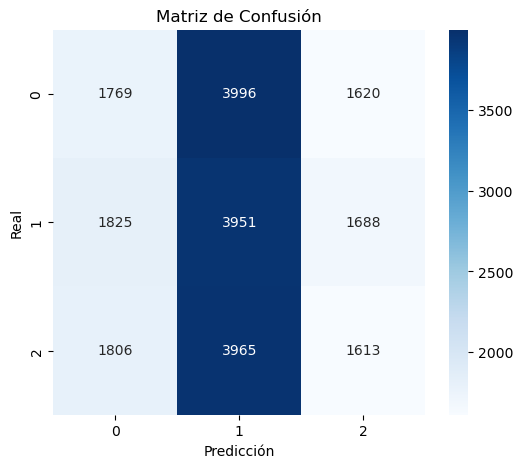

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calcular matriz
cm = confusion_matrix(y_test, y_pred)

# Etiquetas de clases reales
labels = sorted(y_test.unique())  # Por si están codificadas como 0, 1, 2

# Graficar
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


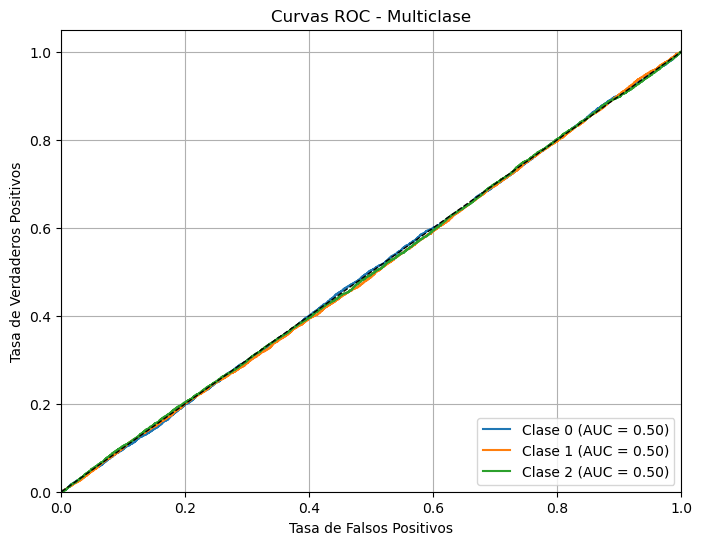

In [55]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarizar clases reales y predichas
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Ya tenemos y_pred_prob del modelo (probabilidades)
fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(8, 6))

# ROC por clase
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob.iloc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')

# Línea diagonal
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curvas ROC - Multiclase")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Rando Forest 

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# === 1. Preparar datos ===
variables = [
    'Numero Creditos Vigentes', 'Zona Geografica', 'Monto Desembolsado',
    'Numero Creditos Cerrados', 'Ventas Negocio',
    'Maximo Dias Mora', 'Zona Comercial', 'Experiencia Bancaria',
    'Ingresos Operativos Negocio', 'Antiguedad Negocio',
    'Ingresos Mensuales', 'Gastos Negocio'
]

# Codificar respuesta
y = datos['Calificacion Crediticia'].astype('category').cat.codes

# Separar predictoras
X = datos[variables]

# Codificar solo las categóricas
X_cat = pd.get_dummies(X.select_dtypes(include=['object']), drop_first=True)
X_num = X.select_dtypes(include=['int64', 'float64'])
X_final = pd.concat([X_num, X_cat], axis=1)

# Dividir train/test
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, stratify=y, random_state=42)

# === 2. Ajustar Random Forest ===
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# === 3. Predicción y evaluación ===
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))


Accuracy: 0.335582242612333

Matriz de Confusión:
 [[2547 2616 2222]
 [2575 2574 2315]
 [2490 2554 2340]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.33      0.34      0.34      7385
           1       0.33      0.34      0.34      7464
           2       0.34      0.32      0.33      7384

    accuracy                           0.34     22233
   macro avg       0.34      0.34      0.34     22233
weighted avg       0.34      0.34      0.34     22233



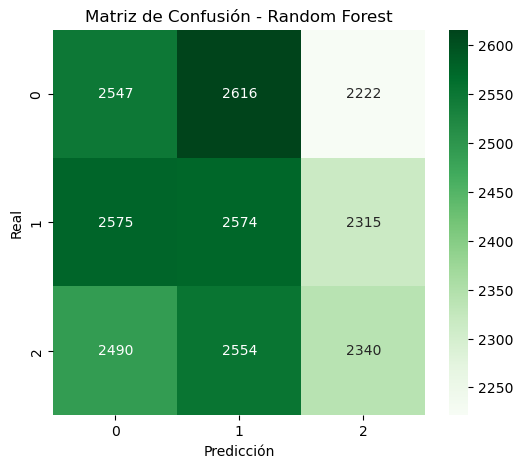

In [57]:
cm = confusion_matrix(y_test, y_pred)
labels = sorted(y_test.unique())

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest")
plt.show()


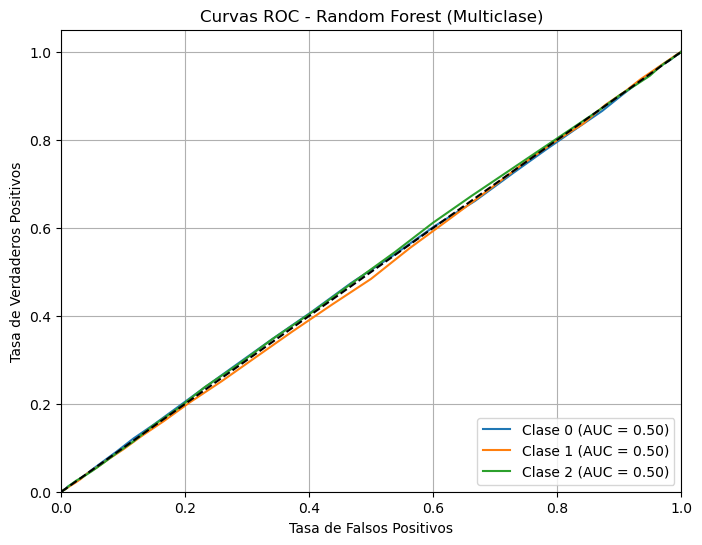

In [58]:
# Binarizar y_test
y_test_bin = label_binarize(y_test, classes=sorted(y.unique()))
n_classes = y_test_bin.shape[1]

fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curvas ROC - Random Forest (Multiclase)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## haciendo las predicciones para todo el data sep

In [ ]:
# 1. Predecir las probabilidades para toda la base
probs = rf.predict_proba(X_final)

# 2. Obtener los nombres de las clases ordenadas como están en el modelo
clases = rf.classes_

# 3. Crear columnas de probabilidades en porcentaje
probs_df = pd.DataFrame(probs * 100, columns=[f'% Riesgo {clase}' for clase in clases])

# 4. Concatenar con la base original
datos_probabilistico = pd.concat([datos.reset_index(drop=True), probs_df], axis=1)


   % Riesgo 0  % Riesgo 1  % Riesgo 2
0        81.0         8.0        11.0
1        13.0        75.0        12.0
2        40.0        30.0        30.0
3        21.0        33.0        46.0
4        35.0        32.0        33.0


In [60]:
datos_probabilistico

,Numero Creditos Vigentes,Zona Geografica,Monto Desembolsado,Ciudad de Residencia,Numero Creditos Cerrados,Ventas Negocio,Producto Financiero,Maximo Dias Mora,Zona Comercial,Calificacion Crediticia,Asesor Comercial,Experiencia Bancaria,Ingresos Operativos Negocio,Antiguedad Negocio,Ingresos Mensuales,Gastos Negocio,% Riesgo 0,% Riesgo 1,% Riesgo 2
0,3,Urbano,61295443,Ciudad 515,21,727628,Producto 2,28,Zona Comercial 2,Alto,Asesor 182,10,4271799,13,1725803,7712270,81.0,8.0,11.0
1,5,Urbano,40119342,Ciudad 834,65,3374750,Producto 8,0,Zona Comercial 2,Bajo,Asesor 196,17,3262552,13,5756382,1844003,13.0,75.0,12.0
2,3,Rural,35452244,Ciudad 856,33,1025512,Producto 26,57,Zona Comercial 1,Bajo,Asesor 39,30,2142591,27,1685907,8741262,40.0,30.0,30.0
3,2,Urbano,40372604,Ciudad 912,8,12222938,Producto 11,12,Zona Comercial 1,Bajo,Asesor 93,4,1223992,14,6850017,6496586,21.0,33.0,46.0
4,6,Urbano,26885164,Ciudad 567,42,1088216,Producto 37,60,Zona Comercial 2,Medio,Asesor 164,20,4783604,12,5824373,3891036,35.0,32.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111156,6,Rural,26908200,Ciudad 764,30,11324457,Producto 42,0,Zona Comercial 2,Bajo,Asesor 123,20,1837942,28,2410577,9111634,34.0,24.0,42.0
111157,3,Urbano,65615640,Ciudad 898,21,6055216,Producto 26,47,Zona Comercial 2,Bajo,Asesor 48,8,6206958,5,832323,5796560,14.0,73.0,13.0
111158,2,Rural,33813105,Ciudad 698,8,1959107,Producto 12,39,Zona Comercial 2,Alto,Asesor 132,7,4884410,13,3284600,3706816,82.0,11.0,7.0
111159,2,Rural,142531742,Ciudad 661,8,9695436,Producto 49,10,Zona Comercial 1,Medio,Asesor 74,4,2671127,8,6013594,2231671,9.0,8.0,83.0


In [62]:
datos_probabilistico.columns

Index(['Numero Creditos Vigentes', 'Zona Geografica', 'Monto Desembolsado',
       'Ciudad de Residencia', 'Numero Creditos Cerrados', 'Ventas Negocio',
       'Producto Financiero', 'Maximo Dias Mora', 'Zona Comercial',
       'Calificacion Crediticia', 'Asesor Comercial', 'Experiencia Bancaria',
       'Ingresos Operativos Negocio', 'Antiguedad Negocio',
       'Ingresos Mensuales', 'Gastos Negocio', '% Riesgo 0', '% Riesgo 1',
       '% Riesgo 2', 'Cluster Riesgo'],
      dtype='object')

## Kmeans

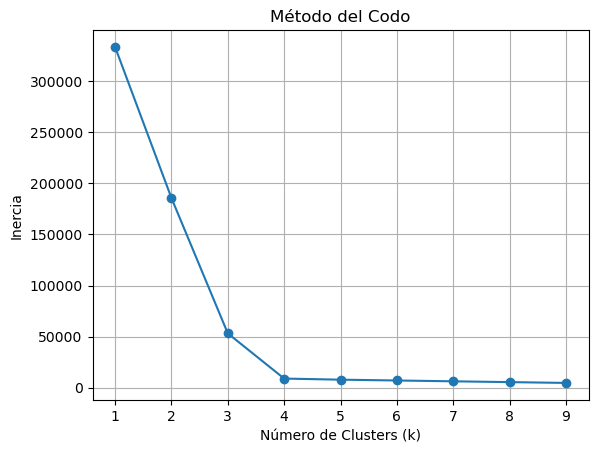

In [68]:
# Método del codo para elegir el número óptimo de clusters
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Variables de entrada para clustering
prob_cols = [col for col in datos_probabilistico.columns if "% Riesgo" in col]
X_cluster = datos_probabilistico[prob_cols]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.grid(True)
plt.show()


In [ ]:

# Aplicar K-means con k = 4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
datos_probabilistico['Cluster Riesgo'] = kmeans.fit_predict(X_scaled)


In [67]:
datos_probabilistico

,Numero Creditos Vigentes,Zona Geografica,Monto Desembolsado,Ciudad de Residencia,Numero Creditos Cerrados,Ventas Negocio,Producto Financiero,Maximo Dias Mora,Zona Comercial,Calificacion Crediticia,Asesor Comercial,Experiencia Bancaria,Ingresos Operativos Negocio,Antiguedad Negocio,Ingresos Mensuales,Gastos Negocio,% Riesgo 0,% Riesgo 1,% Riesgo 2,Cluster Riesgo
0,3,Urbano,61295443,Ciudad 515,21,727628,Producto 2,28,Zona Comercial 2,Alto,Asesor 182,10,4271799,13,1725803,7712270,81.0,8.0,11.0,0
1,5,Urbano,40119342,Ciudad 834,65,3374750,Producto 8,0,Zona Comercial 2,Bajo,Asesor 196,17,3262552,13,5756382,1844003,13.0,75.0,12.0,2
2,3,Rural,35452244,Ciudad 856,33,1025512,Producto 26,57,Zona Comercial 1,Bajo,Asesor 39,30,2142591,27,1685907,8741262,40.0,30.0,30.0,3
3,2,Urbano,40372604,Ciudad 912,8,12222938,Producto 11,12,Zona Comercial 1,Bajo,Asesor 93,4,1223992,14,6850017,6496586,21.0,33.0,46.0,3
4,6,Urbano,26885164,Ciudad 567,42,1088216,Producto 37,60,Zona Comercial 2,Medio,Asesor 164,20,4783604,12,5824373,3891036,35.0,32.0,33.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111156,6,Rural,26908200,Ciudad 764,30,11324457,Producto 42,0,Zona Comercial 2,Bajo,Asesor 123,20,1837942,28,2410577,9111634,34.0,24.0,42.0,3
111157,3,Urbano,65615640,Ciudad 898,21,6055216,Producto 26,47,Zona Comercial 2,Bajo,Asesor 48,8,6206958,5,832323,5796560,14.0,73.0,13.0,2
111158,2,Rural,33813105,Ciudad 698,8,1959107,Producto 12,39,Zona Comercial 2,Alto,Asesor 132,7,4884410,13,3284600,3706816,82.0,11.0,7.0,0
111159,2,Rural,142531742,Ciudad 661,8,9695436,Producto 49,10,Zona Comercial 1,Medio,Asesor 74,4,2671127,8,6013594,2231671,9.0,8.0,83.0,1


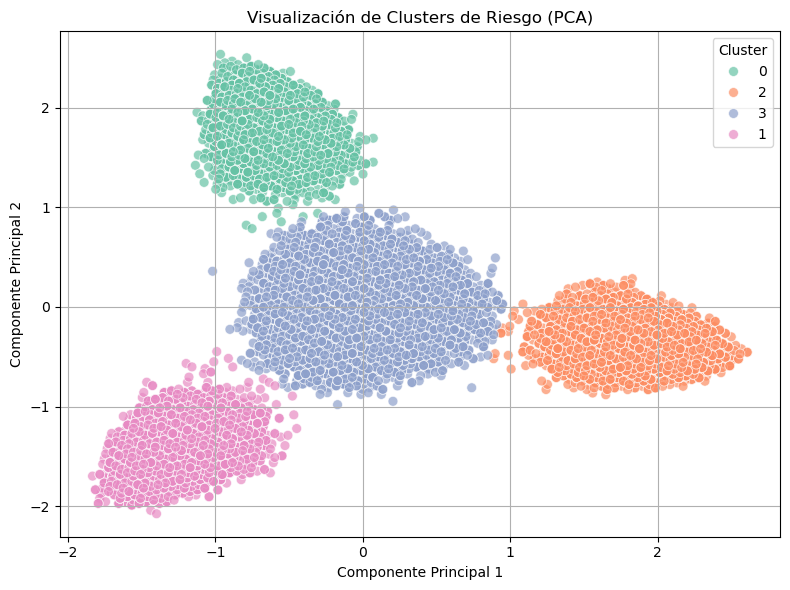

In [69]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar y escalar datos
X_cluster = datos_probabilistico[[col for col in datos_probabilistico.columns if "% Riesgo" in col]]
X_scaled = scaler.fit_transform(X_cluster)

# Reducir a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear un DataFrame para graficar
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df['Cluster'] = datos_probabilistico['Cluster Riesgo'].astype(str)  # para colores en la gráfica

# Graficar los clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", palette="Set2", alpha=0.7, s=50)
plt.title("Visualización de Clusters de Riesgo (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()


In [70]:
# Agrupar por cluster y calcular promedio de variables numéricas
resumen_numericas = datos_probabilistico.groupby('Cluster Riesgo')[[
    'Monto Desembolsado', 'Ingresos Mensuales', 'Gastos Negocio',
    'Antiguedad Negocio', 'Ventas Negocio', 'Numero Creditos Vigentes',
    'Numero Creditos Cerrados', 'Experiencia Bancaria',
    '% Riesgo 0', '% Riesgo 1', '% Riesgo 2'
]].mean().round(2)

print("🔍 Promedios por cluster:")
print(resumen_numericas)


🔍 Promedios por cluster:
                Monto Desembolsado  Ingresos Mensuales  Gastos Negocio  \
Cluster Riesgo                                                           
0                      85611419.01          3913426.88      5235061.20   
1                      84930054.82          3914730.30      5220366.25   
2                      84969414.37          3918249.13      5212660.80   
3                      84641654.90          3917546.17      5232400.11   

                Antiguedad Negocio  Ventas Negocio  Numero Creditos Vigentes  \
Cluster Riesgo                                                                 
0                            16.48      6386478.43                      3.84   
1                            16.53      6406376.60                      3.84   
2                            16.48      6384916.07                      3.83   
3                            16.46      6420931.75                      3.82   

                Numero Creditos Cerrados  Experie

In [71]:
# Distribución de valores por cluster
cat_vars = ['Zona Geografica', 'Zona Comercial', 'Calificacion Crediticia']

for var in cat_vars:
    print(f"\n🔎 Distribución de '{var}' por Cluster:")
    print(pd.crosstab(datos_probabilistico[var], datos_probabilistico['Cluster Riesgo'], normalize='columns').round(2) * 100)



🔎 Distribución de 'Zona Geografica' por Cluster:
Cluster Riesgo      0     1     2     3
Zona Geografica                        
Rural            50.0  50.0  50.0  50.0
Urbano           50.0  50.0  50.0  50.0

🔎 Distribución de 'Zona Comercial' por Cluster:
Cluster Riesgo       0     1     2     3
Zona Comercial                          
Zona Comercial 1  50.0  50.0  51.0  50.0
Zona Comercial 2  50.0  50.0  49.0  50.0
Zona Rural         0.0   0.0   0.0   0.0

🔎 Distribución de 'Calificacion Crediticia' por Cluster:
Cluster Riesgo               0      1      2     3
Calificacion Crediticia                           
Alto                     100.0    0.0    0.0  33.0
Bajo                       0.0    0.0  100.0  34.0
Medio                      0.0  100.0    0.0  33.0


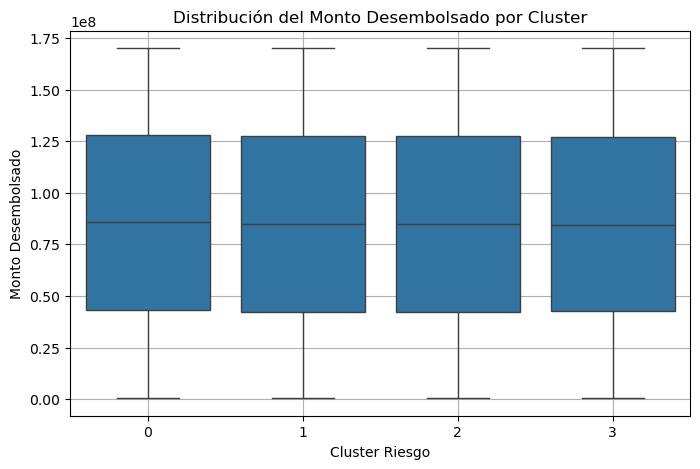

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ejemplo: comparar monto desembolsado por grupo
plt.figure(figsize=(8, 5))
sns.boxplot(data=datos_probabilistico, x="Cluster Riesgo", y="Monto Desembolsado")
plt.title("Distribución del Monto Desembolsado por Cluster")
plt.grid(True)
plt.show()
